In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [21]:
data=pd.read_csv('data.csv')

In [22]:
data.columns

Index(['Name', 'Runs Scored', 'Balls Played', 'Strike Rate', 'Boundaries',
       'Sixes', 'Matches Played', 'Dismissals', '50s', '100s',
       'Wins Contributed', 'Runs in Powerplay', 'Runs in Middle Overs',
       'Runs in Death Overs'],
      dtype='object')

In [13]:
data.rename(columns={'Unnamed: 0':'Name'},inplace=True)

In [31]:
data.shape

(537, 15)

In [24]:
temp=data['Runs Scored']/data['Dismissals']

In [28]:
data.insert(4,'Average',temp)

## Variance Analysis


In [56]:
data_filt=data[data['Balls Played']>400]

In [57]:
data_filt

,Name,Runs Scored,Balls Played,Strike Rate,Average,Boundaries,Sixes,Matches Played,Dismissals,50s,100s,Wins Contributed,Runs in Powerplay,Runs in Middle Overs,Runs in Death Overs
0,SC Ganguly,1349,1326,101.73,25.452830,138,42,56,53,7,0,20,529,706,114
1,BB McCullum,2880,2267,127.04,27.692308,293,130,109,104,13,2,55,1555,1167,158
3,DJ Hussey,1322,1101,120.07,26.979592,90,60,61,49,5,0,27,134,911,277
5,R Dravid,2174,1918,113.35,28.233766,271,28,82,77,11,0,37,905,1109,160
7,V Kohli,5878,4609,127.53,38.168831,504,202,184,154,39,5,84,1724,3186,968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,RA Tripathi,988,756,130.69,25.333333,95,37,44,39,5,0,20,520,359,109
444,V Shankar,654,528,123.86,29.727273,44,25,32,22,3,0,11,26,390,238
471,Shubman Gill,939,766,122.58,33.535714,87,24,37,28,7,0,17,382,438,119
477,PP Shaw,826,605,136.53,21.736842,99,27,38,38,6,0,22,559,249,18


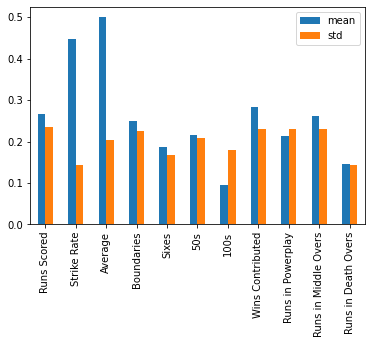

In [58]:
std_list=[]
mean_list=[]
column_list=[]
min_max_scaler=preprocessing.MinMaxScaler()
for column in data_filt.columns:
    if column in ['Name','Balls Played','Dismissals','Matches Played']:
        continue
    temp=data_filt[column].to_numpy()
    scaled_temp=min_max_scaler.fit_transform(temp.reshape(-1,1))
    std_list.append(np.std(scaled_temp))
    mean_list.append(np.mean(scaled_temp))
    column_list.append(column)
df = pd.DataFrame({'mean': mean_list,
                   'std': std_list}, index=column_list)
ax = df.plot.bar(rot=90)
